# EAS4305/6305 mixed layer depth

    - The goal of this homework is to use the CTD profile data to calculate sigma-theta and N2
    - Use the sigma-theta profile to define MLD

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

### (a) Read BATS data and calculate sigma-theta

In [2]:
# Step 1 download data from BATS and create data vectors
df=pd.read_excel('b10331_ctd.xls')
data=df.to_numpy()
# The first column is cast id
castid=data[:,0]
# The 4th column is latitude
lat=data[:,3]
# The 5th column is longitude, 
lon=-data[:,4] # longitude is in degree W so it should be negative
# The 6th column is depth
dep=data[:,5]
# The 7th column is pressure
p=data[:,6]
# The 8th column is temperature
t=data[:,7]
# The 10th column is salinity
sp=data[:,9]

In [3]:
# Step 2 calculate sigma-theta
# select cast 
ca=(castid == 10331002)
sa = gsw.SA_from_SP(sp[ca],p[ca],lon[ca],lat[ca])
ct = gsw.CT_from_t(sa,t[ca],p[ca])
[N2_sel,p_N2]=gsw.Nsquared(sa,ct,p[ca],lat[ca])
#
sigma0_sel = gsw.sigma0(sa,ct)
pres_sel = p[ca]

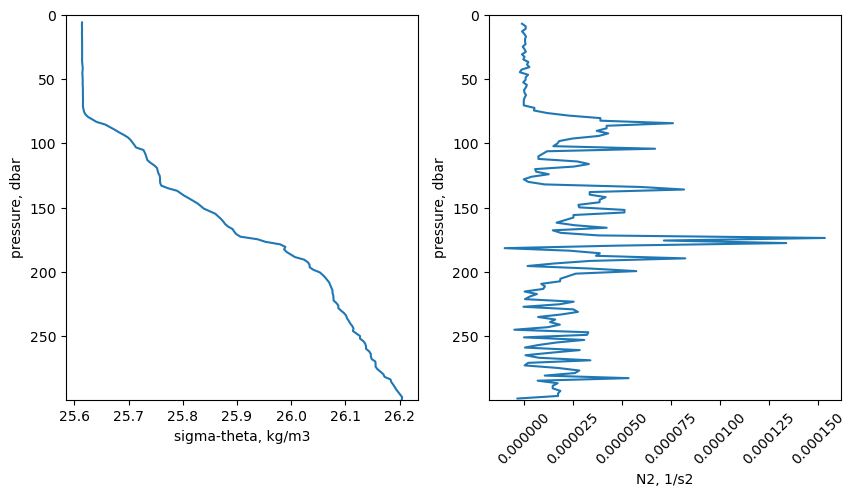

In [4]:
# plot
fig=plt.figure(figsize=(10,5))
ax=fig.subplots(1,2)
ax[0].plot(sigma0_sel,pres_sel,label='sigma-theta')
ax[0].set_xlabel('sigma-theta, kg/m3')
ax[0].set_ylabel('pressure, dbar')
ax[0].set_ylim(max(pres_sel),0)
#
ax[1].plot(N2_sel,p_N2,label='N2')
ax[1].set_xlabel('N2, 1/s2')
ax[1].set_ylabel('pressure, dbar')
ax[1].set_ylim(max(pres_sel),0)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

### (b) Determine mixed layer depth using sigma-theta profile

In [5]:
# First calculate the surface value
sig0_surf = min(sigma0_sel)
print(f'Surface sigma-theta = {np.round(sig0_surf,2)} kg/m3')

Surface sigma-theta = 25.61 kg/m3


In [6]:
# Start the loop 
#
# density threshold
sig0_crit = 0.125
#
for n,pres in enumerate(pres_sel):
    offset = sigma0_sel[n] - sig0_surf
    if offset < sig0_crit:
        mld = pres_sel[n]
# 
print(f'Mixed layer depth is {np.round(mld,2)} dbar level')

Mixed layer depth is 113.17 dbar level


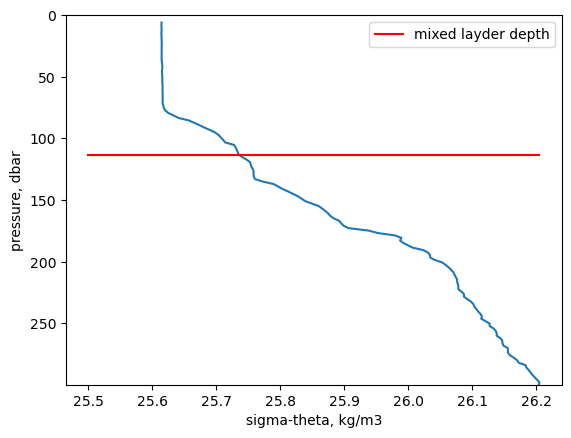

In [7]:
# plot
plt.plot(sigma0_sel,pres_sel)
plt.plot([25.5, max(sigma0_sel)],[mld, mld],'r',label='mixed layder depth')
plt.ylim(max(pres_sel),0)
plt.xlabel('sigma-theta, kg/m3')
plt.ylabel('pressure, dbar')
plt.legend()